In [ ]:
# =============================
# 📦 Step 1: Imports
# =============================
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# =============================
# 🧩 Step 2: Load CIFAR-10 Dataset
# =============================
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Train:", x_train.shape, " Test:", x_test.shape)

# Normalize pixels
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

# =============================
# 🧠 Step 3: Define a Lightweight CNN
# =============================
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# =============================
# ⚙️ Step 4: Train the Model
# =============================
history = model.fit(
    x_train, y_train_cat,
    epochs=20,
    batch_size=64,
    validation_data=(x_test, y_test_cat),
    verbose=1
)

# =============================
# 📊 Step 5: Evaluate
# =============================
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\n✅ Test accuracy: {test_acc*100:.2f}%")

# Optional: Classification report
y_pred = model.predict(x_test)
y_pred_classes = tf.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

# =============================
# 🐕 Step 6: Predict a Custom Image
# =============================
from tensorflow.keras.preprocessing import image
import numpy as np
import os

labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

def predict_image(img_path):
    if not os.path.exists(img_path):
        print("❌ Image not found:", img_path)
        return
    img = image.load_img(img_path, target_size=(32,32))
    img = image.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    label = labels[int(np.argmax(pred))]
    print("🖼️ Image:", img_path)
    print("✅ Predicted Class:", label)
    return label

# Example (after upload):
# from google.colab import files
# uploaded = files.upload()
# predict_image("dog.jpg")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train: (50000, 32, 32, 3)  Test: (10000, 32, 32, 3)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 272,170 (1.04 MB)

 Trainable params: 271,978 (1.04 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 254ms/step - accuracy: 0.2197 - loss: 2.1117 - val_accuracy: 0.3533 - val_loss: 1.6176
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 198s 253ms/step - accuracy: 0.3595 - loss: 1.6632 - val_accuracy: 0.5369 - val_loss: 1.2665
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 200s 251ms/step - accuracy: 0.4883 - loss: 1.4005 - val_accuracy: 0.5909 - val_loss: 1.1387
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 197s 253ms/step - accuracy: 0.5708 - loss: 1.1947 - val_accuracy: 0.6657 - val_loss: 0.9455
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 203s 254ms/step - accuracy: 0.6223 - loss: 1.0777 - val_accuracy: 0.6732 - val_loss: 0.9235
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 200s 251ms/step - accuracy: 0.6524 - loss: 0.9938 - val_accuracy: 0.6922 - val_loss: 0.8882
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 204s 254ms/step - accuracy: 0.6774 - loss: 0.9247 - val_accuracy: 0.7148 - val_loss: 0.8252
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 198s 253ms/step - accuracy: 0.6934 -

Saving Unti52453tled.jpeg to Unti52453tled.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


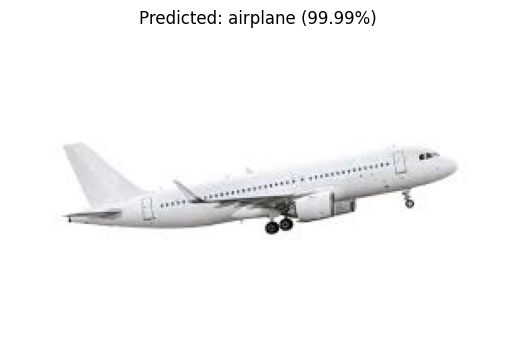

🖼️ Image: Unti52453tled.jpeg
✅ Predicted Class: airplane
📈 Confidence: 99.99%


In [ ]:
# =============================
# 🐕 Step 6: Upload & Predict a Custom Image
# =============================
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import files

labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

def upload_and_predict():
    # Step 1: Upload image
    uploaded = files.upload()   # Opens file chooser
    for filename in uploaded.keys():
        img_path = '/content/' + filename

        # Step 2: Load and preprocess
        img = image.load_img(img_path, target_size=(32, 32))
        img = image.img_to_array(img) / 255.0
        img = np.expand_dims(img, axis=0)

        # Step 3: Predict
        pred = model.predict(img)
        label_idx = int(np.argmax(pred))
        label = labels[label_idx]
        confidence = float(np.max(pred)) * 100

        # Step 4: Display image + result
        plt.imshow(image.load_img(img_path))
        plt.axis('off')
        plt.title(f"Predicted: {label} ({confidence:.2f}%)")
        plt.show()

        print(f"🖼️ Image: {filename}")
        print(f"✅ Predicted Class: {label}")
        print(f"📈 Confidence: {confidence:.2f}%")

# =============================
# ▶️ Run this cell to upload and predict
# =============================
upload_and_predict()
